## 导入库

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
color = sns.color_palette()

from sklearn.metrics import normalized_mutual_info_score  # NMI
from sklearn.metrics import rand_score  # RI
from sklearn.metrics import accuracy_score  # ACC
from sklearn.metrics import f1_score  # F-measure

In [2]:
def clustering_indicators(labels_true, labels_pred):
    f_measure = f1_score(labels_true, labels_pred, average='macro')  # F值
    accuracy = accuracy_score(labels_true, labels_pred)  # ACC
    normalized_mutual_information = normalized_mutual_info_score(labels_true, labels_pred)  # NMI
    rand_index = rand_score(labels_true, labels_pred)  # RI
    return f_measure, accuracy, normalized_mutual_information, rand_index

In [3]:
df_pca = pd.read_csv('data_pca.csv')
X_pca = df_pca.drop(['age'], axis = 1)
y_pca = df_pca['age']

## Svm_pca

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_pca, test_size = 0.33, random_state = 123)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import joblib


paramsSvm = {
'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
'C': [0.1, 1, 10],
'gamma': [0.01, 0.1, 0.5, 1, 2]
}

joblib.parallel_backend('threading')  # 或者使用'multiprocessing'，取决于你的偏好和环境

Svm = GridSearchCV(SVC(), paramsSvm, cv=5, verbose=10, n_jobs=-1)

Svm.fit(X_train, y_train)

model_svm = Svm.best_estimator_
print(f"Best Score: {Svm.best_score_}")
print(f"Best Parameters: {Svm.best_params_}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5; 1/60] START C=0.1, gamma=0.01, kernel=linear...........................
[CV 2/5; 1/60] START C=0.1, gamma=0.01, kernel=linear...........................
[CV 3/5; 1/60] START C=0.1, gamma=0.01, kernel=linear...........................
[CV 4/5; 1/60] START C=0.1, gamma=0.01, kernel=linear...........................
[CV 5/5; 1/60] START C=0.1, gamma=0.01, kernel=linear...........................
[CV 1/5; 2/60] START C=0.1, gamma=0.01, kernel=poly.............................
[CV 2/5; 2/60] START C=0.1, gamma=0.01, kernel=poly.............................
[CV 3/5; 2/60] START C=0.1, gamma=0.01, kernel=poly.............................
[CV 2/5; 1/60] END C=0.1, gamma=0.01, kernel=linear;, score=0.802 total time=   0.2s
[CV 4/5; 2/60] START C=0.1, gamma=0.01, kernel=poly.............................
[CV 1/5; 1/60] END C=0.1, gamma=0.01, kernel=linear;, score=0.827 total time=   0.2s
[CV 5/5; 2/60] START C=0.1, gamma=0.01,

In [7]:
svc = model_svm
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [8]:
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
svc_train_acc = svc.score(X_train, y_train) 
print('Training Score: ', svc_train_acc)
svc_test_acc = svc.score(X_test, y_test)
print('Testing Score: ', svc_test_acc)


F_measure, ACC, NMI, RI = clustering_indicators(y_test, y_pred)
print("F_measure:", F_measure, "ACC:", ACC, "NMI", NMI, "RI", RI)

c:\Users\hechu\anaconda3\envs\linear_reg\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hechu\anaconda3\envs\linear_reg\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hechu\anaconda3\envs\linear_reg\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.80      0.61      0.69       452
           2       0.82      0.92      0.87       853

    accuracy                           0.81      1307
   macro avg       0.54      0.51      0.52      1307
weighted avg       0.81      0.81      0.81      1307

Confusion Matrix: 
 [[  0   2   0]
 [  0 276 176]
 [  0  65 788]]
Training Score:  0.8098830629950962
Testing Score:  0.8140780413159908
F_measure: 0.5205678030342363 ACC: 0.8140780413159908 NMI 0.273864743261548 RI 0.6987525059433771


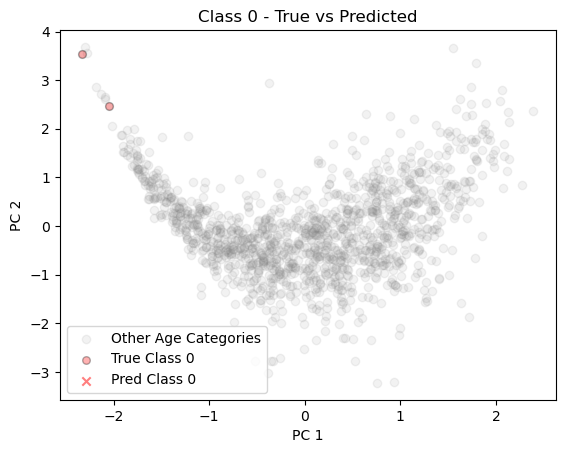

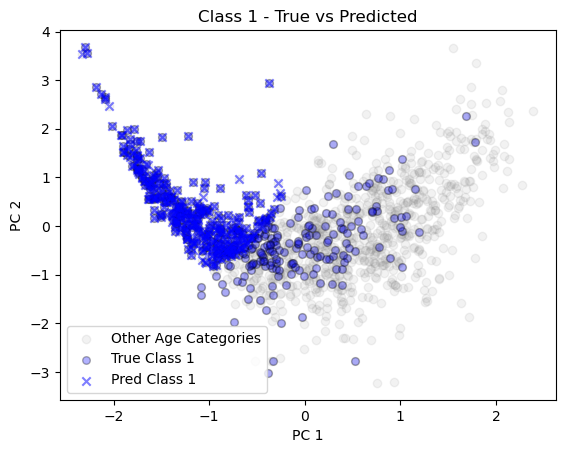

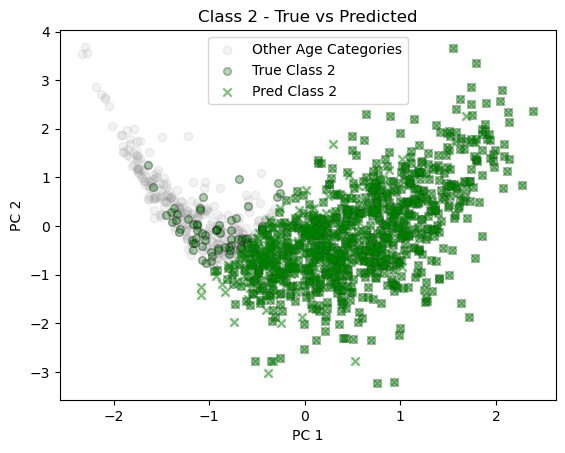

In [9]:
# 同样的假设条件
categories = [0, 1, 2]
colors = ['red', 'blue', 'green']

# 对于每个类别，单独创建并显示图表
for idx, category in enumerate(categories):
    # 创建新的图表
    plt.figure(figsize=(6.4, 4.8))
    
    # 选择当前类别的样本
    mask_true = y_test == category
    mask_pred = y_pred == category

    plt.scatter(X_test[:, 0], X_test[:, 1],
                   c='gray', 
                   alpha=0.1, 
                   label='Other Age Categories',
                   zorder=1)
    
    plt.scatter(X_test[mask_true, 0], X_test[mask_true, 1], 
                 c=colors[idx], marker='o', edgecolors='black', s=30,
                 label=f'True Class {category}', alpha=0.3,zorder=2)
    
    
    plt.scatter(X_test[mask_pred, 0], X_test[mask_pred, 1], 
                 c=colors[idx], marker='x', label=f'Pred Class {category}',
                 alpha=0.5, zorder=3)
    
    
    plt.title(f'Class {category} - True vs Predicted')
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()


plt.show()

## Svm_kpca

In [10]:
df_kpca = pd.read_csv('data_kpca.csv')
X_kpca = df_kpca.drop(['age'], axis = 1)
y_kpca = df_kpca['age']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_kpca, y_kpca, test_size = 0.33, random_state = 123)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import joblib


paramsSvm = {
'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
'C': [0.1, 1, 10],
'gamma': [0.01, 0.1, 0.5, 1, 2]
}

joblib.parallel_backend('threading')  # 或者使用'multiprocessing'，取决于你的偏好和环境

Svm = GridSearchCV(SVC(), paramsSvm, cv=5, verbose=10, n_jobs=-1)

Svm.fit(X_train, y_train)

model_svm = Svm.best_estimator_
print(f"Best Score: {Svm.best_score_}")
print(f"Best Parameters: {Svm.best_params_}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5; 1/60] START C=0.1, gamma=0.01, kernel=linear...........................
[CV 2/5; 1/60] START C=0.1, gamma=0.01, kernel=linear...........................
[CV 3/5; 1/60] START C=0.1, gamma=0.01, kernel=linear...........................
[CV 4/5; 1/60] START C=0.1, gamma=0.01, kernel=linear...........................
[CV 5/5; 1/60] START C=0.1, gamma=0.01, kernel=linear...........................
[CV 1/5; 2/60] START C=0.1, gamma=0.01, kernel=poly.............................
[CV 2/5; 2/60] START C=0.1, gamma=0.01, kernel=poly.............................
[CV 3/5; 2/60] START C=0.1, gamma=0.01, kernel=poly.............................
[CV 2/5; 1/60] END C=0.1, gamma=0.01, kernel=linear;, score=0.779 total time=   0.2s
[CV 4/5; 2/60] START C=0.1, gamma=0.01, kernel=poly.............................
[CV 4/5; 1/60] END C=0.1, gamma=0.01, kernel=linear;, score=0.770 total time=   0.2s
[CV 5/5; 2/60] START C=0.1, gamma=0.01,

In [14]:
svc = model_svm
y_pred = svc.predict(X_test)

In [13]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [15]:
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
svc_train_acc = svc.score(X_train, y_train) 
print('Training Score: ', svc_train_acc)
svc_test_acc = svc.score(X_test, y_test)
print('Testing Score: ', svc_test_acc)

F_measure, ACC, NMI, RI = clustering_indicators(y_test, y_pred)
print("F_measure:", F_measure, "ACC:", ACC, "NMI", NMI, "RI", RI)

c:\Users\hechu\anaconda3\envs\linear_reg\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hechu\anaconda3\envs\linear_reg\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hechu\anaconda3\envs\linear_reg\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.79      0.57      0.66       452
           2       0.80      0.92      0.86       853

    accuracy                           0.80      1307
   macro avg       0.53      0.50      0.51      1307
weighted avg       0.80      0.80      0.79      1307

Confusion Matrix: 
 [[  0   2   0]
 [  0 259 193]
 [  0  66 787]]
Training Score:  0.7944172010562052
Testing Score:  0.8003060443764346
F_measure: 0.5078855509030583 ACC: 0.8003060443764346 NMI 0.24432490833568615 RI 0.681812270129858


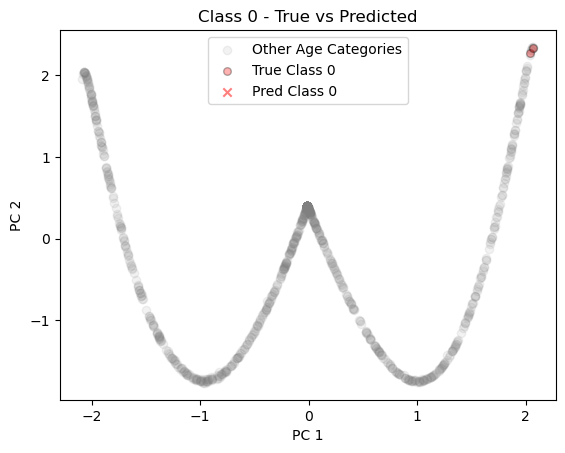

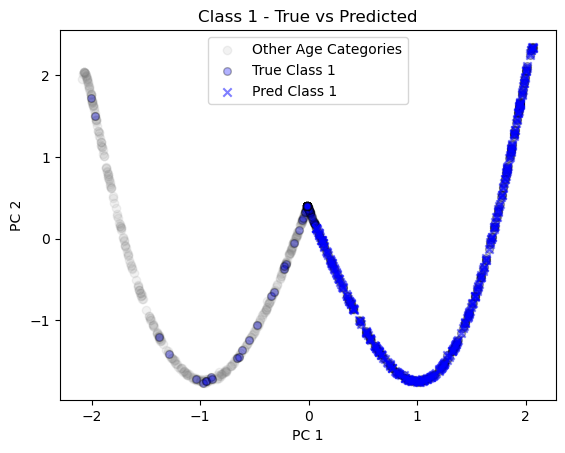

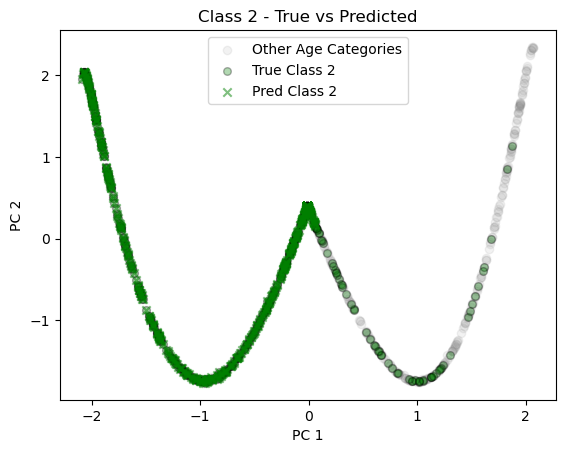

In [16]:
# 同样的假设条件
categories = [0, 1, 2]
colors = ['red', 'blue', 'green']

# 对于每个类别，单独创建并显示图表
for idx, category in enumerate(categories):
    # 创建新的图表
    plt.figure(figsize=(6.4, 4.8))
    
    # 选择当前类别的样本
    mask_true = y_test == category
    mask_pred = y_pred == category

    plt.scatter(X_test[:, 0], X_test[:, 1],
                   c='gray', 
                   alpha=0.1, 
                   label='Other Age Categories',
                   zorder=1)
    
    plt.scatter(X_test[mask_true, 0], X_test[mask_true, 1], 
                 c=colors[idx], marker='o', edgecolors='black', s=30,
                 label=f'True Class {category}', alpha=0.3,zorder=2)
    
    
    plt.scatter(X_test[mask_pred, 0], X_test[mask_pred, 1], 
                 c=colors[idx], marker='x', label=f'Pred Class {category}',
                 alpha=0.5, zorder=3)
    
    
    plt.title(f'Class {category} - True vs Predicted')
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()


plt.show()

## Svm_lda

In [17]:
df_lda = pd.read_csv('data_lda.csv')
X_lda = df_lda.drop(['age'], axis = 1)
y_lda = df_lda['age']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y_lda, test_size = 0.33, random_state = 123)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import joblib


paramsSvm = {
'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
'C': [0.1, 1, 10],
'gamma': [0.01, 0.1, 0.5, 1, 2]
}

joblib.parallel_backend('threading')  # 或者使用'multiprocessing'，取决于你的偏好和环境

Svm = GridSearchCV(SVC(), paramsSvm, cv=5, verbose=10, n_jobs=-1)

Svm.fit(X_train, y_train)

model_svm = Svm.best_estimator_
print(f"Best Score: {Svm.best_score_}")
print(f"Best Parameters: {Svm.best_params_}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5; 1/60] START C=0.1, gamma=0.01, kernel=linear...........................
[CV 2/5; 1/60] START C=0.1, gamma=0.01, kernel=linear...........................
[CV 3/5; 1/60] START C=0.1, gamma=0.01, kernel=linear...........................
[CV 4/5; 1/60] START C=0.1, gamma=0.01, kernel=linear...........................
[CV 5/5; 1/60] START C=0.1, gamma=0.01, kernel=linear...........................
[CV 1/5; 2/60] START C=0.1, gamma=0.01, kernel=poly.............................
[CV 2/5; 2/60] START C=0.1, gamma=0.01, kernel=poly.............................
[CV 3/5; 2/60] START C=0.1, gamma=0.01, kernel=poly.............................
[CV 1/5; 1/60] END C=0.1, gamma=0.01, kernel=linear;, score=0.842 total time=   0.1s
[CV 4/5; 2/60] START C=0.1, gamma=0.01, kernel=poly.............................
[CV 2/5; 1/60] END C=0.1, gamma=0.01, kernel=linear;, score=0.798 total time=   0.1s
[CV 5/5; 2/60] START C=0.1, gamma=0.01,

In [21]:
svc = model_svm 
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [22]:
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
svc_train_acc = svc.score(X_train, y_train) 
print('Training Score: ', svc_train_acc)
svc_test_acc = svc.score(X_test, y_test)
print('Testing Score: ', svc_test_acc)

F_measure, ACC, NMI, RI = clustering_indicators(y_test, y_pred)
print("F_measure:", F_measure, "ACC:", ACC, "NMI", NMI, "RI", RI)

c:\Users\hechu\anaconda3\envs\linear_reg\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hechu\anaconda3\envs\linear_reg\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hechu\anaconda3\envs\linear_reg\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.80      0.68      0.73       452
           2       0.84      0.91      0.88       853

    accuracy                           0.83      1307
   macro avg       0.55      0.53      0.54      1307
weighted avg       0.83      0.83      0.83      1307

Confusion Matrix: 
 [[  0   2   0]
 [  0 307 145]
 [  0  75 778]]
Training Score:  0.8234628442097321
Testing Score:  0.8301453710788065
F_measure: 0.5368586289638921 ACC: 0.8301453710788065 NMI 0.30801535373202993 RI 0.7194233898984266


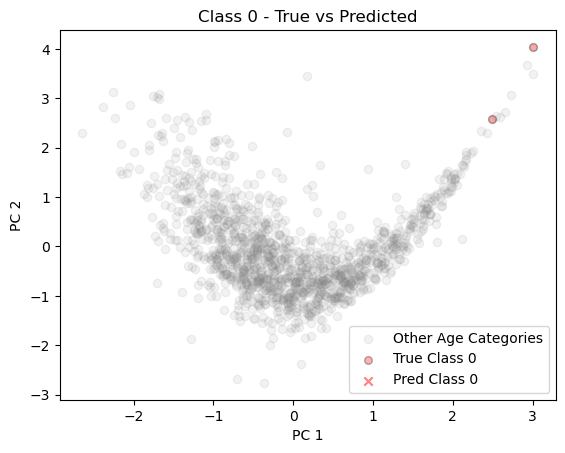

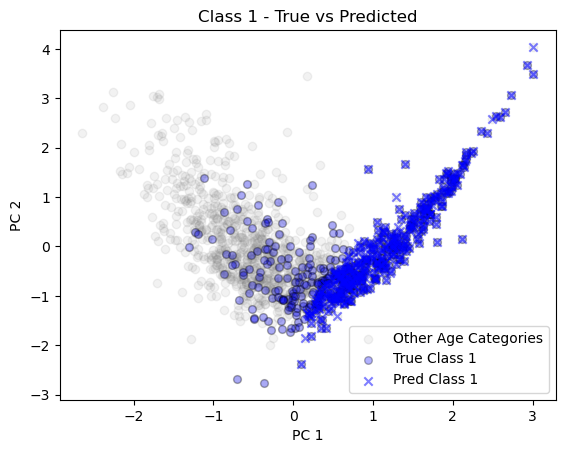

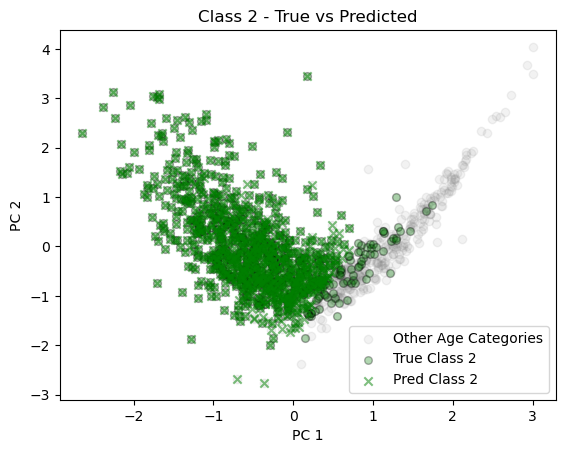

In [23]:
# 同样的假设条件
categories = [0, 1, 2]
colors = ['red', 'blue', 'green']

# 对于每个类别，单独创建并显示图表
for idx, category in enumerate(categories):
    # 创建新的图表
    plt.figure(figsize=(6.4, 4.8))
    
    # 选择当前类别的样本
    mask_true = y_test == category
    mask_pred = y_pred == category

    plt.scatter(X_test[:, 0], X_test[:, 1],
                   c='gray', 
                   alpha=0.1, 
                   label='Other Age Categories',
                   zorder=1)
    
    plt.scatter(X_test[mask_true, 0], X_test[mask_true, 1], 
                 c=colors[idx], marker='o', edgecolors='black', s=30,
                 label=f'True Class {category}', alpha=0.3,zorder=2)
    
    
    plt.scatter(X_test[mask_pred, 0], X_test[mask_pred, 1], 
                 c=colors[idx], marker='x', label=f'Pred Class {category}',
                 alpha=0.5, zorder=3)
    
    
    plt.title(f'Class {category} - True vs Predicted')
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()


plt.show()

https://blog.csdn.net/qq_43647936/article/details/130686246

https://github.com/helloWorldchn/MachineLearning/tree/main